In [1]:
import random
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [317]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27a82c6cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f27a7ed0990>]], dtype=object)

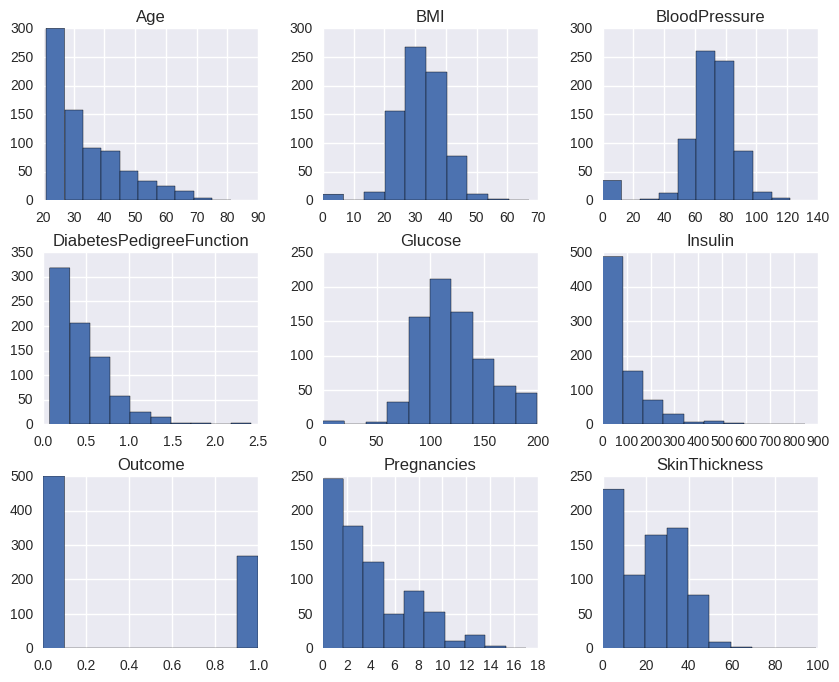

In [8]:
#count plot for each variable
df.hist(figsize=(10,8))

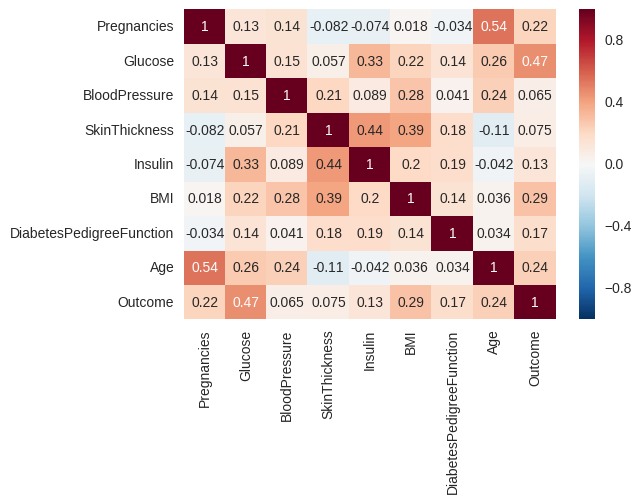

In [9]:
#correlation between different variables
sns.heatmap(df.corr(), annot = True)

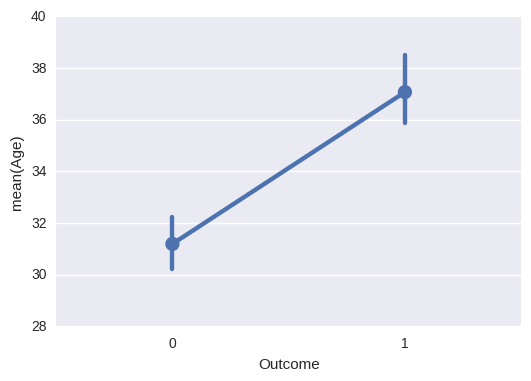

In [21]:
sns.pointplot(x='Outcome',y='Age',data=df)

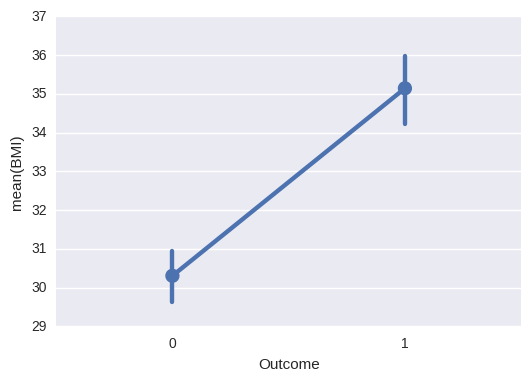

In [17]:
sns.pointplot(x='Outcome',y='BMI',data=df)

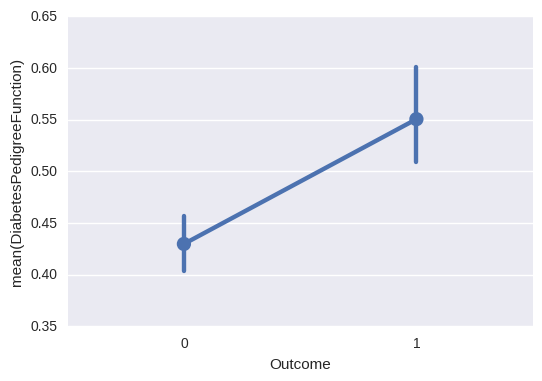

In [22]:
sns.pointplot(x='Outcome',y='DiabetesPedigreeFunction',data=df)

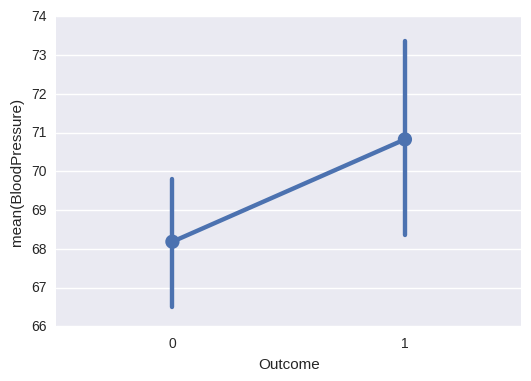

In [23]:
sns.pointplot(x='Outcome',y='BloodPressure',data=df)

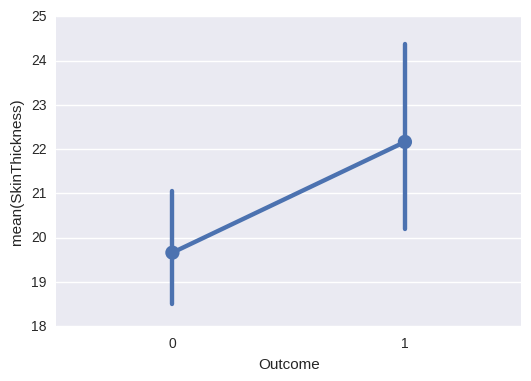

In [24]:
sns.pointplot(x='Outcome',y='SkinThickness',data=df)

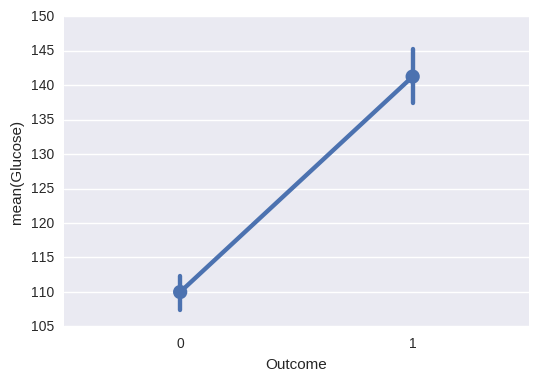

In [25]:
sns.pointplot(x='Outcome',y='Glucose',data=df)

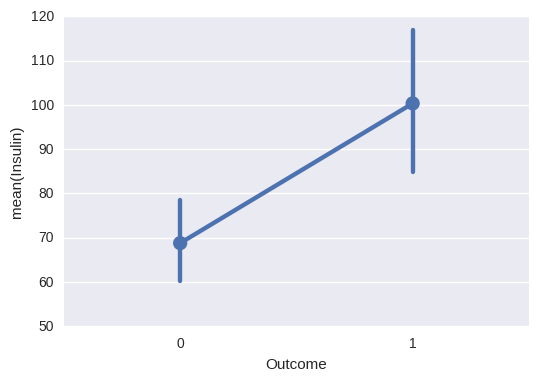

In [27]:
sns.pointplot(x='Outcome',y='Insulin',data=df)

In [318]:
def split(data,p):
    a=[]
    b=[]
    n=data.shape[0]
    
    for i in range(n):
        x=random.random()
        if x<=p:
            a.append(i)
        else:
            b.append(i)
    return data.iloc[a],data.iloc[b]        

In [319]:
test,train=split(df,0.3)

In [320]:
print train.shape,test.shape

(518, 9) (250, 9)


In [321]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def hypothesis(x,coef):
    h=coef[0]
    for i in xrange(1,len(coef)):
        h+=coef[i]*x[i-1]
    return sigmoid(h)
    
def gradient_decent(x,y,coef):
    n1=x.shape[0]
    b=np.array([0.0 for i in xrange(len(coef))],dtype=np.float)
    b1=np.array([[0.0 for i in range(len(coef))] for j in range(len(coef))])
    
    for i in xrange(n1):
        h=hypothesis(x.iloc[i],coef)
       
        b[0]+=(h-float(y.iloc[i]))*(1.0/(float(n1)))
        c1=[[1.0]]
        
        for j in xrange(1,len(coef)):
            b[j]+=(1.0/float(n1))*(h-float(y.iloc[i]))*x.iloc[i,j-1]
            c1.append([x.iloc[i,j-1]])
            
        c1=np.array(c1,dtype=np.float)
        c=c1.reshape((1,len(coef)))
        c1=c1.dot(c)
        c1=c1*h*(1-h)*(1.0/(float(n1)))
        b1+=c1
     
    H=np.linalg.inv(b1)
    H=H.dot(b)
    coef-=H
    return coef        

def LogisticRegression(x,y,iterations):
    coef=np.array([0 for i in xrange(x.shape[1]+1)],dtype=np.float)
    
    for iteration in xrange(iterations):
        coef=gradient_decent(x,y,coef)
    return coef    

In [333]:
#variables used in model
vars=['Age','BMI','DiabetesPedigreeFunction','Glucose']

In [334]:
#training data and calculating coefficients 
coef=LogisticRegression(train[vars],train['Outcome'],10)

In [335]:
#function to predict dataset
def predict(x,y,coef):
    accuray=0
    for i in range(x.shape[0]):
        pred=hypothesis(x.iloc[i],coef)
        if pred>=0.4:
            o=1
        else:
            o=0
        if o==y.iloc[i]:
            accuray+=1

    print 'Acurracy :',accuray/float(x.shape[0])*100.0        

In [336]:
#Accuracy 
predict(test[vars],test['Outcome'],coef)

Acurracy : 76.8


In [337]:
coef

array([-8.9074529 ,  0.03644743,  0.09755118,  0.37628554,  0.02896631])